# 1A Data Wizard :
Muhamad Ali Yafi

Hafiizh Taufiqul Hakim

Sutin Bobihu

Muhammad Sodikur Rifki

Larasati Syarafina Qamarani

Ligia Juita Sari

Anggun Nur Musyarofah

Silvia Risma Febiola Marbun

# 1. Descriptive Statistics

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah, misal untuk A: “Semua tipe data sudah sesuai”

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import statsmodels.stats.proportion as sp

In [2]:
df=pd.read_csv("Training Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


## A. Kolom dengan tipe data yang kurang sesuai 
"Id" diubah ke object karena karakter pada Id bukanlah kumpulan angka yang bisa dilakukan operasi matematika. Sehingga diperlukan penyesuaian dengan mengubah tipe data pada kolom Id dari Int64 menjadi object.

In [4]:
df['Id'] = df['Id'].astype(str)

## B. kolom yang memiliki nilai kosong

In [5]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
df.duplicated().sum()

0

Tidak ada data yang kosong atau data yang hilang dari dataset diatas.

## C. kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

In [7]:
# Membagi kolom berdasarkan tipe data numeric dan category
category = ["Married/Single", "House_Ownership", "Car_Ownership", "Profession", "CITY", "STATE"]
numerical = ["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS", "Risk_Flag"]

In [8]:
df[category].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


**Dari summary kolom kategorikal, terlihat bahwa tidak ada ketimpangan data yang signifikan.**

- Kolom Married/Single memiliki 2 data unique dimana value dengan frekuensi paling banyak adalah 'single'.
- Kolom House_Ownership memiliki 3 unique value dimana 'rented' sebagai value dengan frekuensi terbanyak.
- Kolom Car_Ownership memiliki 2 unique value dengan 'no' sebagai yang merepresentasikan bahwa nasabah tidak memiliki rumah, merupakan value dengan frekuensi paling banyak.
- Kolom Profession, CITY, dan STATE memiliki beragam unique value.
- Dari kesimpulan ini, dapat dikatakan bahwa data yang tersedia dalam dataset sudah sesuai dan dapat digunakan.

In [9]:
df[numerical].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


**Dari statistical summary kolom numerik pada dataset, data yang tersedia dapat dikatakan sudah sesuai.**

* Tidak terlihat adanya ketimpangan data yang signifikan. Nilai min dan max maupun nilai mean dan median pada setiap kolom tidak memiliki jarak yang terlalu jauh sehingga masih dalam batas wajar.
* Nilai min, max, dan quartile pada kolom Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, dan Risk_Flag berupa bilangan bulat. Sedangkan kolom Income sudah pasti memiliki nilai berupa desimal karena terdapat banyak variasi nilai.



## Understanding Value Data

### NUMERICAL

In [10]:
df.Income.value_counts().to_frame().T

Income,7936020,9775375,1996629,9345456,1886371,9099898,1112644,479113,9215706,9624827,...,1802525,2126767,2405667,7124173,5637625,8927336,5656901,8171741,3164826,9070230
count,77,71,71,70,40,40,40,40,40,40,...,1,1,1,1,1,1,1,1,1,1


In [11]:
df.Age.value_counts().to_frame().T

Age,27,66,48,33,41,45,54,68,35,50,...,32,75,39,38,46,44,73,36,51,52
count,5197,5092,4967,4921,4827,4806,4785,4772,4643,4624,...,3834,3829,3800,3793,3627,3622,3569,3444,3397,3197


In [12]:
df.Experience.value_counts().to_frame().T

Experience,6,9,12,18,10,5,14,19,17,16,...,15,4,13,1,11,20,8,7,2,0
count,13158,12936,12800,12601,12503,12441,12369,12287,12131,12106,...,11993,11807,11713,11575,11449,11350,11350,11232,11087,11043


In [13]:
df.CURRENT_JOB_YRS.value_counts().to_frame().T

CURRENT_JOB_YRS,3,4,5,6,7,8,9,10,11,1,2,0,12,13,14
count,29460,28339,25091,23491,19925,18874,17132,15768,13595,11575,11087,11043,10605,9099,6916


In [14]:
df.CURRENT_HOUSE_YRS.value_counts().to_frame().T

CURRENT_HOUSE_YRS,11,12,13,14,10
count,51873,51791,50659,49003,48674


In [15]:
df.Risk_Flag.value_counts().to_frame().T

Risk_Flag,0,1
count,221004,30996


### CATEGORY

In [16]:
df.House_Ownership.value_counts().to_frame().T

House_Ownership,rented,owned,norent_noown
count,231898,12918,7184


In [17]:
df.Car_Ownership.value_counts().to_frame().T

Car_Ownership,no,yes
count,176000,76000


In [18]:
df.Profession.value_counts().to_frame().T

Profession,Physician,Statistician,Web_designer,Psychologist,Computer_hardware_engineer,Drafter,Magistrate,Fashion_Designer,Air_traffic_controller,Comedian,...,Chef,Librarian,Civil_engineer,Designer,Economist,Firefighter,Chartered_Accountant,Civil_servant,Official,Engineer
count,5957,5806,5397,5390,5372,5359,5357,5304,5281,5259,...,4635,4628,4616,4598,4573,4507,4493,4413,4087,4048


In [19]:
df.CITY.value_counts().to_frame().T

CITY,Vijayanagaram,Bhopal,Bulandshahr,Saharsa[29],Vijayawada,Srinagar,Indore,New_Delhi,Hajipur[31],Satara,...,Patna,Loni,Bihar_Sharif,Chandrapur,Purnia[26],Ujjain,Warangal[11][12],Bettiah[33],Katni,Karaikudi
count,1259,1208,1185,1180,1172,1136,1130,1098,1098,1096,...,510,509,501,499,494,486,459,457,448,431


In [20]:
df.STATE.value_counts().to_frame().T

STATE,Uttar_Pradesh,Maharashtra,Andhra_Pradesh,West_Bengal,Bihar,Tamil_Nadu,Madhya_Pradesh,Karnataka,Gujarat,Rajasthan,...,Uttarakhand,Jammu_and_Kashmir,Puducherry,Mizoram,Manipur,Himachal_Pradesh,Tripura,Uttar_Pradesh[5],Chandigarh,Sikkim
count,28400,25562,25297,23483,19780,16537,14122,11855,11408,9174,...,1874,1780,1433,849,849,833,809,743,656,608


In [21]:
df.Id.value_counts().to_frame().T

Id,1,167991,167993,167994,167995,167996,167997,167998,167999,168000,...,84000,84001,84002,84003,84004,84005,84006,84007,84008,252000
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [23]:
value_counts = df['Married/Single'].value_counts().to_frame().T

print(value_counts)

Married/Single  single  married
count           226272    25728


## **OBSERVASI**

Dari dataset diatas sudah bisa digunakan karena tidak terdapat value yang timpang untuk semua feature dari dataset.

# 2. Univariate Analysis

A. Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). 

B. Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). 

C. Jelaskan juga apa yang harus di-follow up saat data pre-processing.

## A. Cek Visualisasi Distribusi

### Coulumn Numeric

#### 1. Histogram

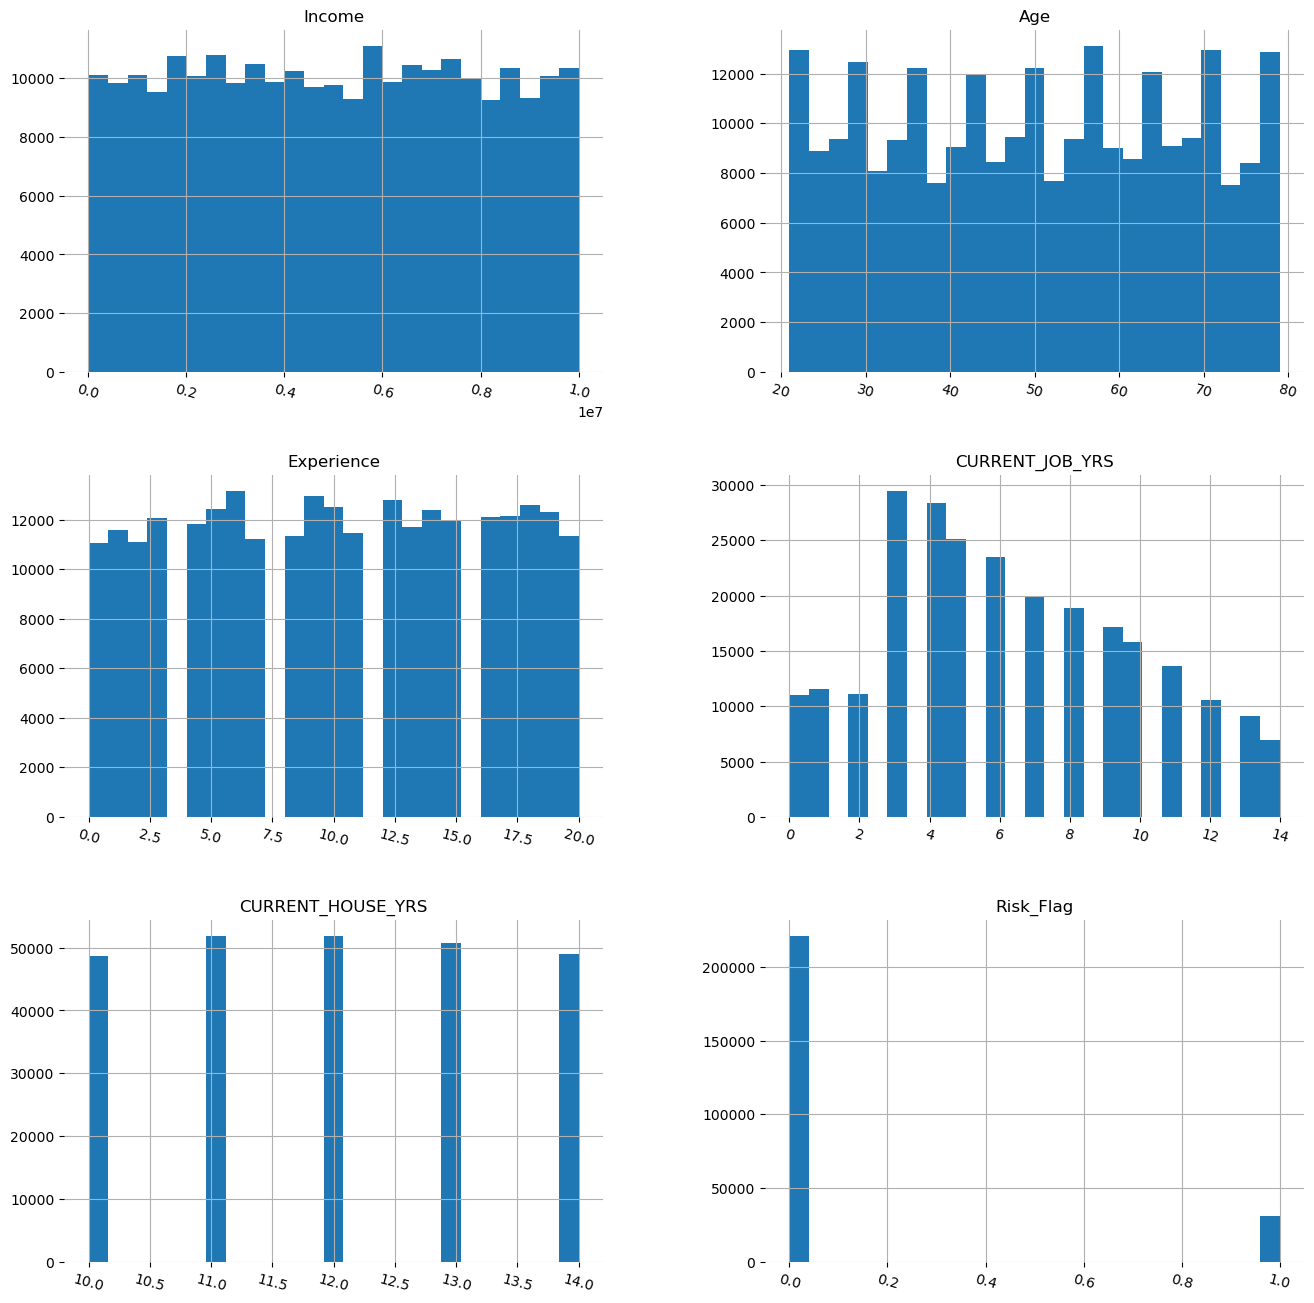

In [24]:
h = df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

#### 2. Boxplot

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\3517406604.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\3517406604.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\3517406604.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\3517406604.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\3517406604.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


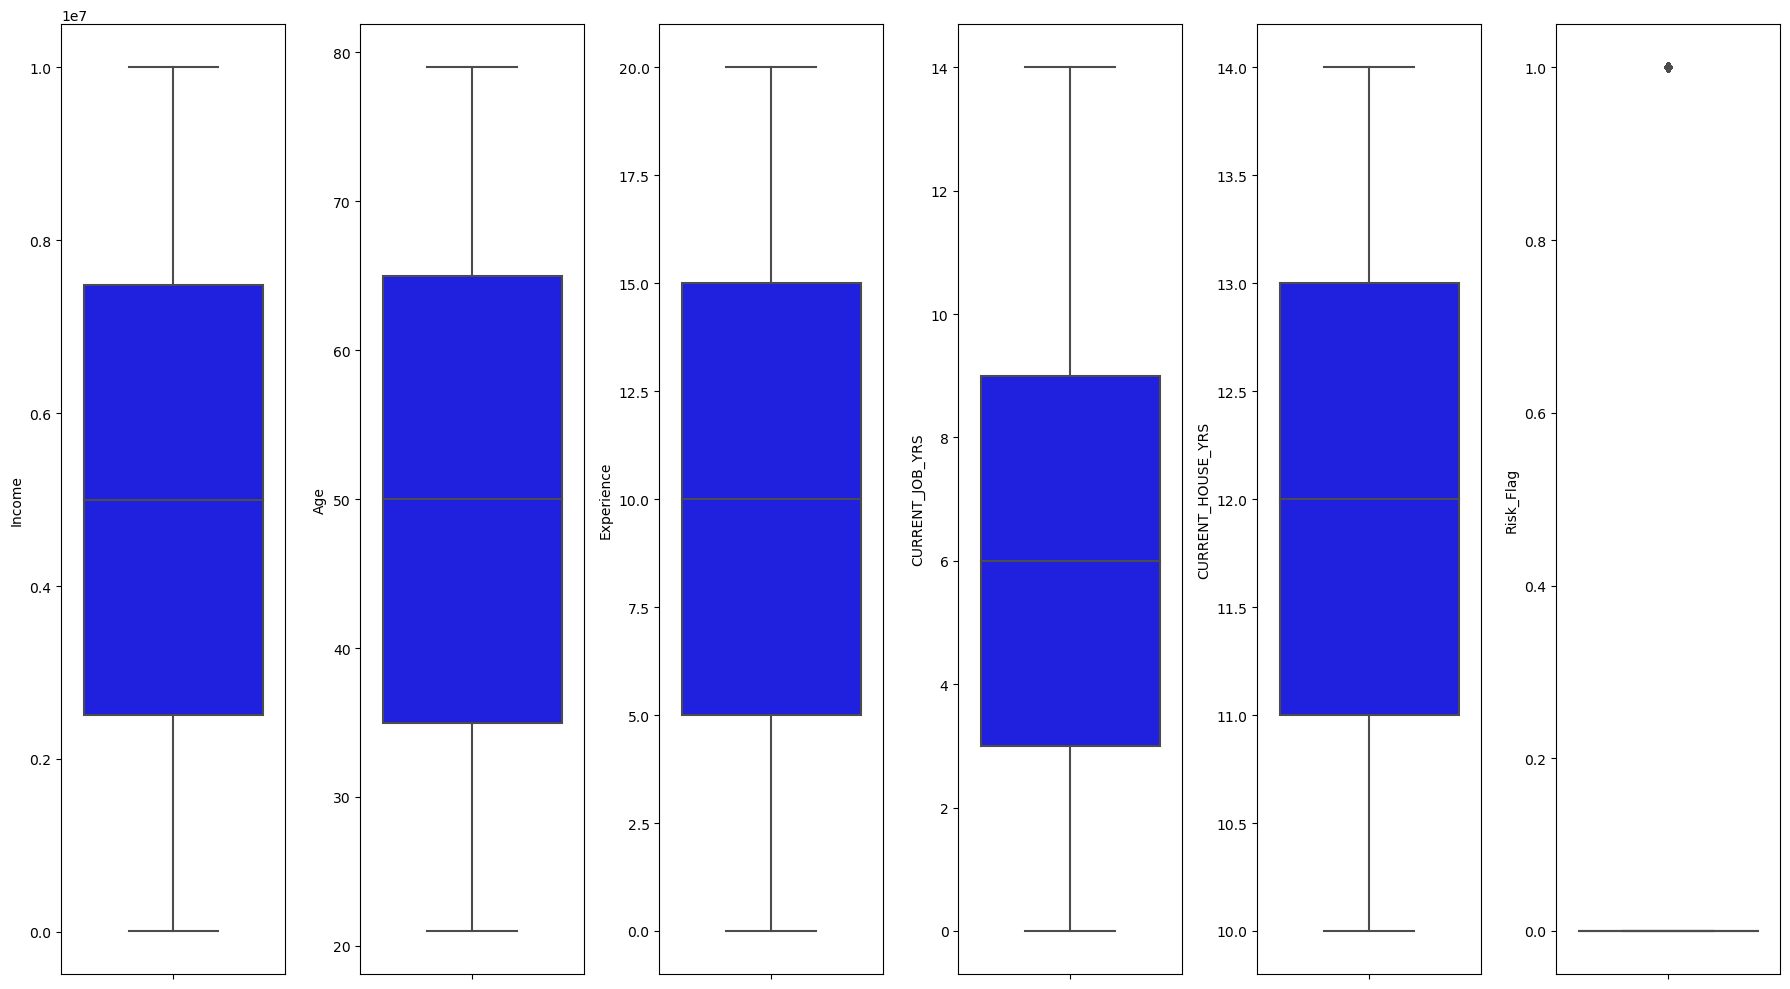

In [27]:
feature = numerical

plt.figure(figsize=(18, 10))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.boxplot(y=df[feature[i]], color='blue', orient='v')
    plt.tight_layout()

#### 3. Distribusi KDE

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\2113032378.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\2113032378.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\2113032378.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\2113032378.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\2113032378.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


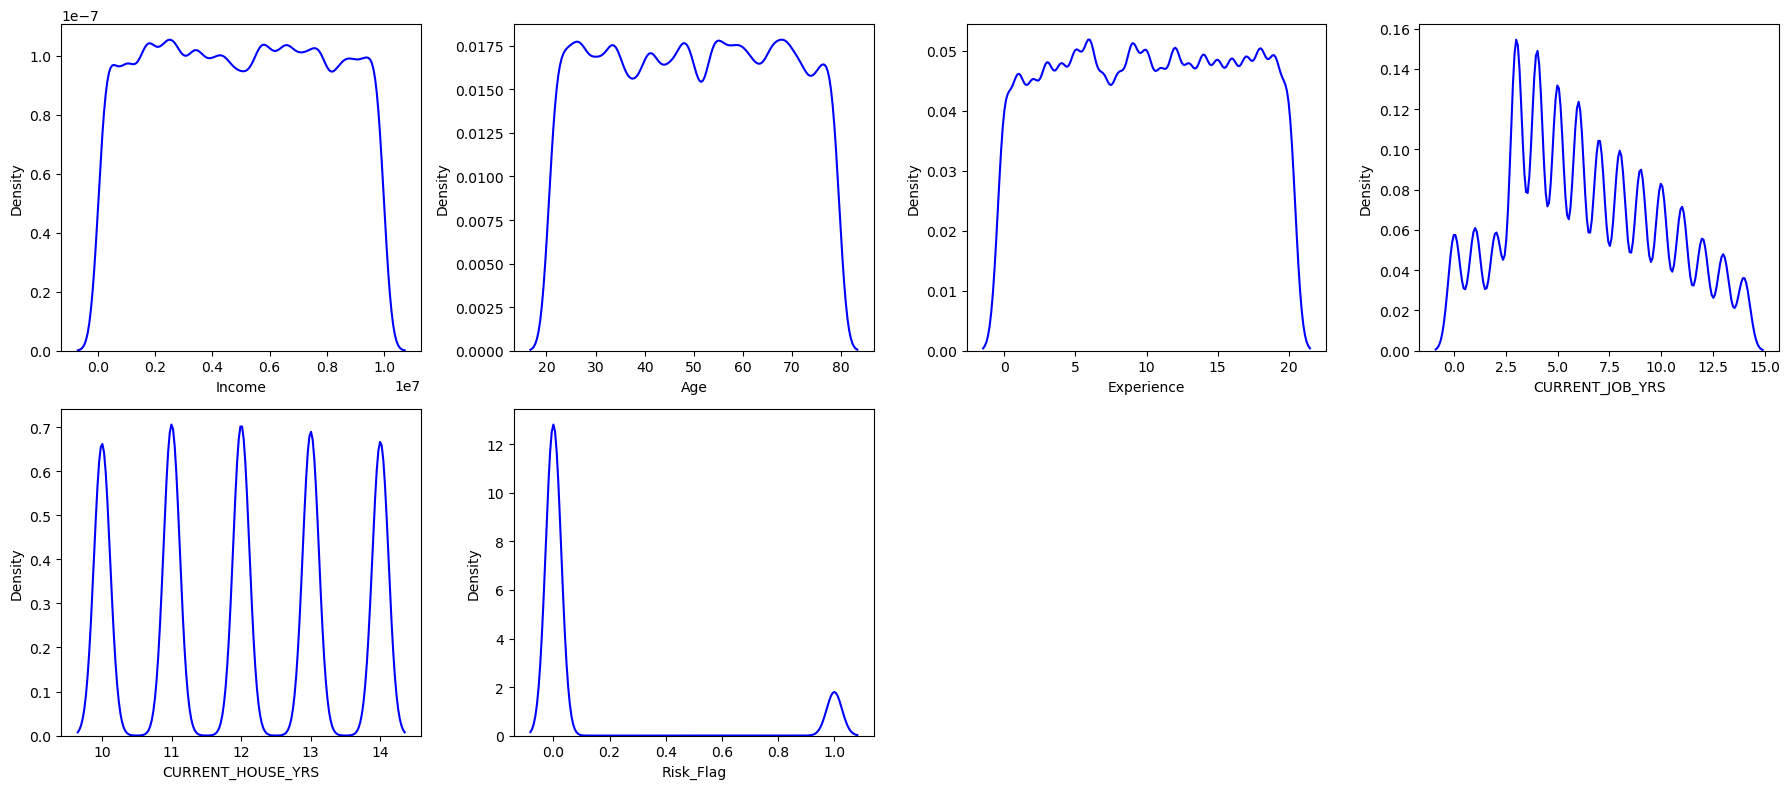

In [28]:
feature = numerical

plt.figure(figsize=(18, 8))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.kdeplot(x=df[feature[i]], color='blue')  
    plt.xlabel(feature[i])
    plt.tight_layout()

#### 4. Violin Plot

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\1685560784.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\1685560784.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\1685560784.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\1685560784.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\1685560784.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


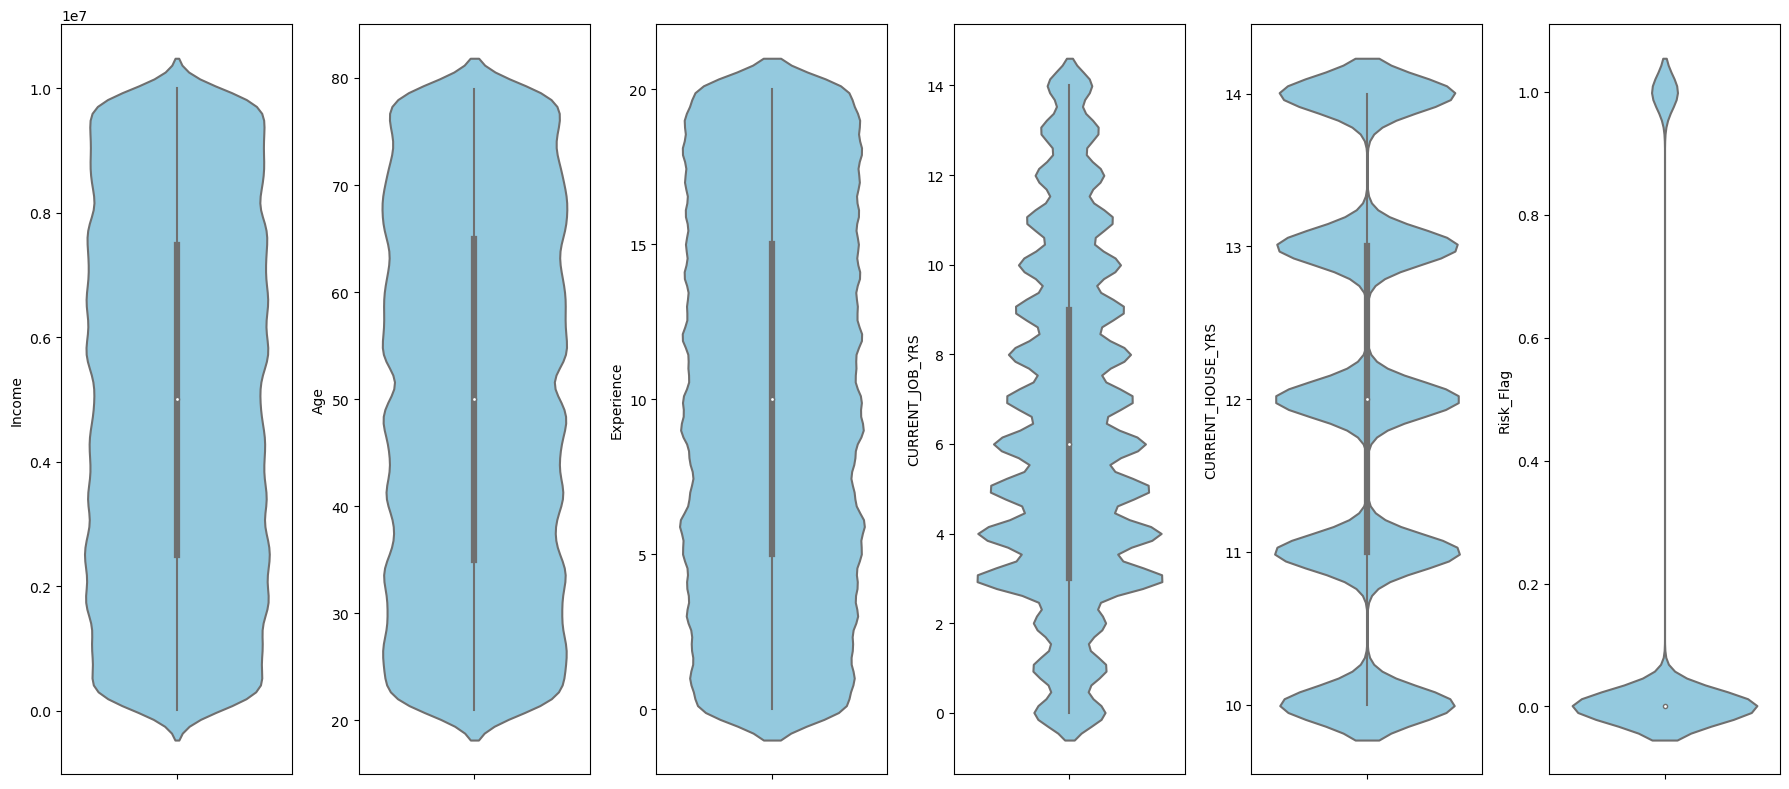

In [30]:
feature = numerical

plt.figure(figsize=(18, 8))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.violinplot(y=df[feature[i]], color='skyblue')
    plt.tight_layout()

#### 5. Distribusi ECDF

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\84499629.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


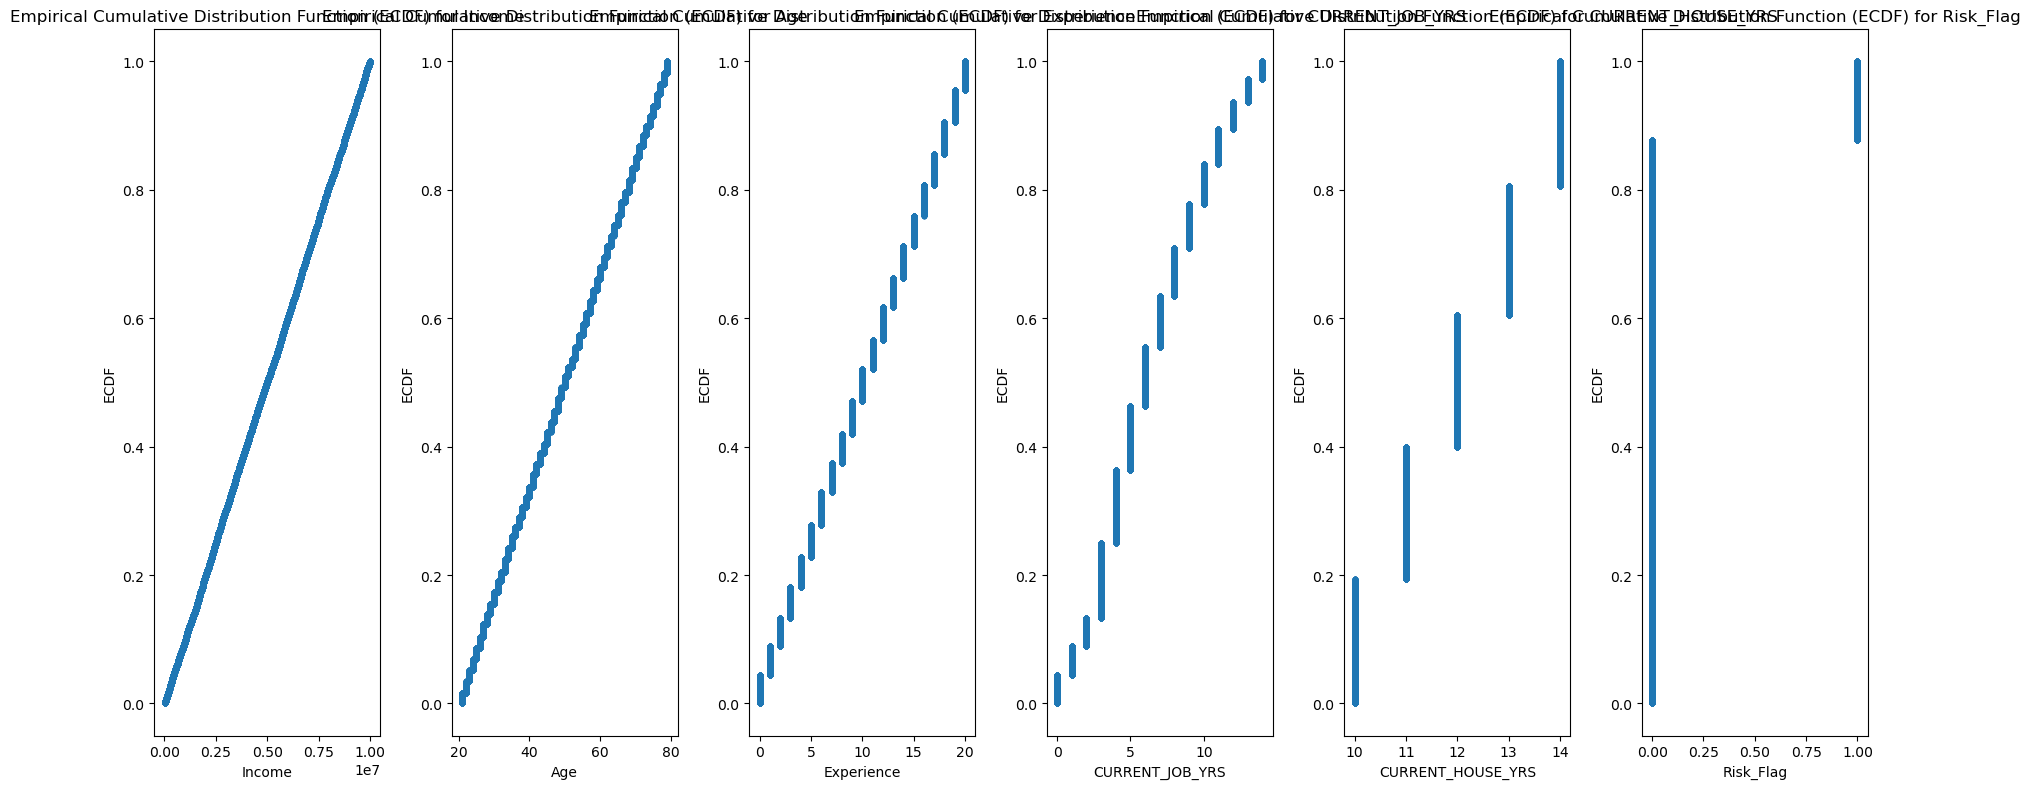

In [31]:
import numpy as np
import matplotlib.pyplot as plt

feature = numerical 

plt.figure(figsize=(18, 8))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    
    sorted_data = np.sort(df[feature[i]])
    n = len(df[feature[i]])
    y = np.arange(1, n+1) / n

    plt.plot(sorted_data, y, marker='.', linestyle='none')
    
    plt.xlabel(feature[i])
    plt.ylabel('ECDF')
    plt.title(f'Empirical Cumulative Distribution Function (ECDF) for {feature[i]}')

    plt.tight_layout()

plt.show()


### Coulumn Category

Horizontal
Vertical

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\1471172245.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\1471172245.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


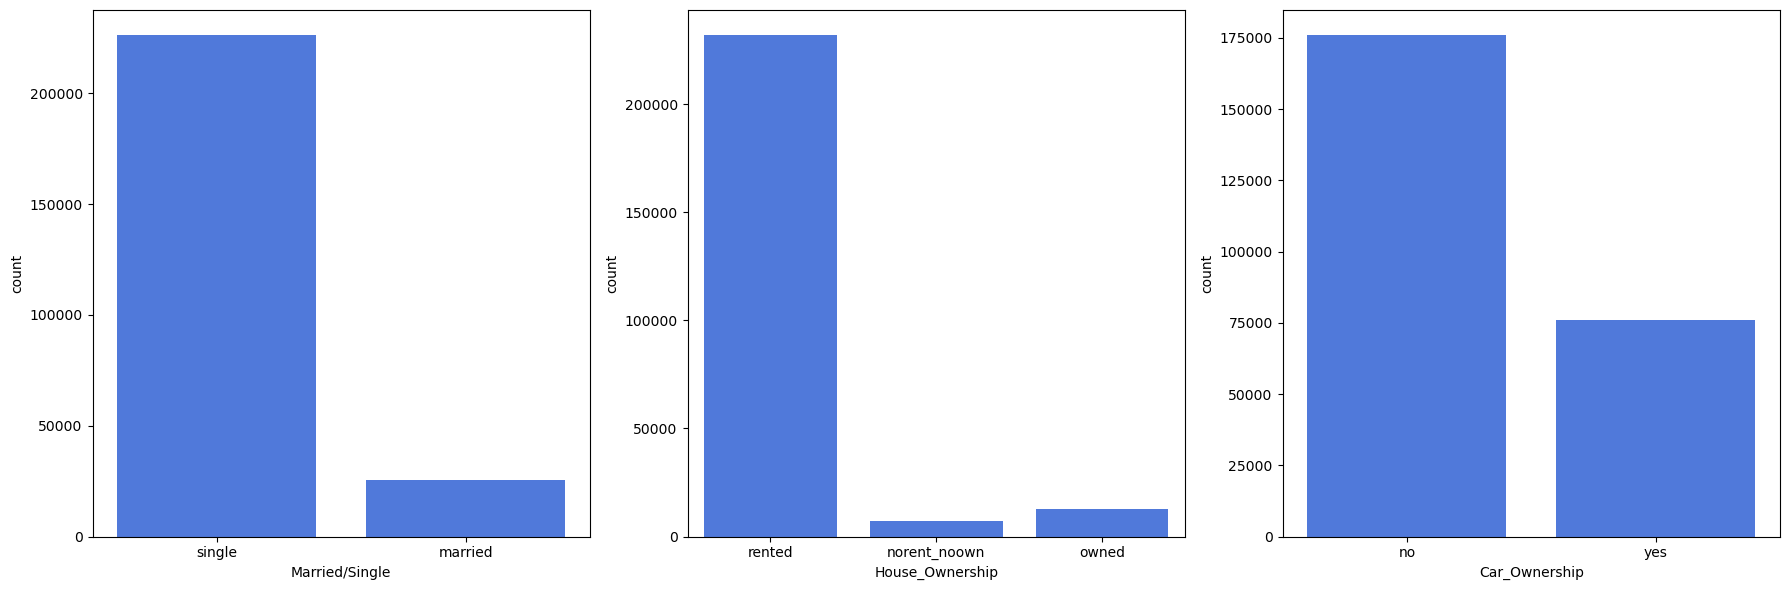

In [32]:
plt.figure(figsize=(18, 6))
categorical = ["Married/Single", "House_Ownership", "Car_Ownership"]
features=categorical

for i in range(len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color='#3970F1')
    plt.tight_layout()
plt.show()

### OBSERVASI

Dari pengecekkan distribusi yang dilakukan oleh Tim Data Wizard, yaitu:
- Histogram; dimana kita melihat tumpukkan dari masing-masing feature
- Boxplot; dimana kita melihat apakah feature dari dataset mempunyai outlier atau tidak
- KDE Plot; Melihat distribusi data apakah normal, bimodal.
- Violin Plot; Penggabungan dari Boxplot dan Histogram dimanaTim mendapat informasi distribusi data
- ECDF; Tim bisa melihat kumulatif proporsi data

**Visualisasi Numeric**

BOXPLOT
 
"Income", "CURRENT_HOUSE_YRS", "Experience" menunjukkan distribusi normal dalam bentuk simetris boxplot dimana;

- Garis median berada di tengah kotak,
- Garis ujung kotak menunjukkan kuartil (Q1, Q3),
- Garis melintang (whiskers) menunjukkan rentang interkuartil (IQR), rentang antara (Q1, Q3),
- Tidak ada titik outlier dalam data ini. Boxplot ini memberikan informasi jelas tentang sebaran "Income", "CURRENT_HOUSE_YRS", "Experience" yang berpusat di sekitar nilai median.
- CURRENT_JOB_YRS menunjukkan distribusi data yang cenderung menumpuk dibagian paling rendah/bawah.

KDE 
- Untuk plot Income, Age, dan Experience dapat dilihat bahwa plot berdistribusi normal.
- Untuk plot CURRENT_JOB_YRS, dapat dilihat bahwa kepadatan puncak terjadi pada sekitar 5 tahun dan kemudian menurun secara bertahap setelah itu. Ini menunjukkan bahwa sebagian besar orang yang bekerja di perusahaan tersebut memiliki pengalaman kerja antara 3 hingga 7 tahun. Setelah itu, jumlah orang yang bekerja di perusahaan tersebut menurun secara bertahap. Pola distribusi ini bisa dikatakan Positively Skewed
- Untuk plot CURRENT_HOUSE_YRS, dapat dilihat bahwa data menunjukkan stabilitas atau kestabilan dalam jangka waktu tertentu. Dalam grafik tersebut, memiliki pola steady state atau dapat diindikasi bahwa tidak ada perubahan signifikan atau tren yang terlihat dalam data tersebut.
- Untuk plot Risk_flag berdasarkan persebaran distribusi, terlihat bahwa mayoritas pelanggan tidak berisiko gagal bayar yaitu saat Risk_FLag = 0, sedangkan pelanggan yang berisiko atau Risk_Flag = 1 berjumlah sedikit namun signifikan dalam dataset.
- Plot "CURRENT_JOB_YRS" "CURRENT_HOUSE_YRS" dan "Risk_Flag" termasuk tipe distribusi Bimodal.

**Visualisasi Category**

1. Terdapat ketimpangan yang besar pada *House Ownership* antara rented, norent_noown dan owned.
2. Terdapat ketimpangan yang besar pada *Marriage/single* antara dimana mayoritas pelanggan merupakan single
3. Countplot *Car_wonership* yaitu, jumlah individu yang tidak menggunakan mobil lebih banyak dari pada individu yang menggunakan mobil.
Ini menunjukkan dalam analisis risiko kredit, kepemilikan mobil dapat menjadi faktor yang memengaruhi kemampuan seseorang untuk membayar pinjaman.


## 3. Multivariate Analysis 

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?

* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

#### A. Melihat korelasi antar fitur

**Correlation Numeric**

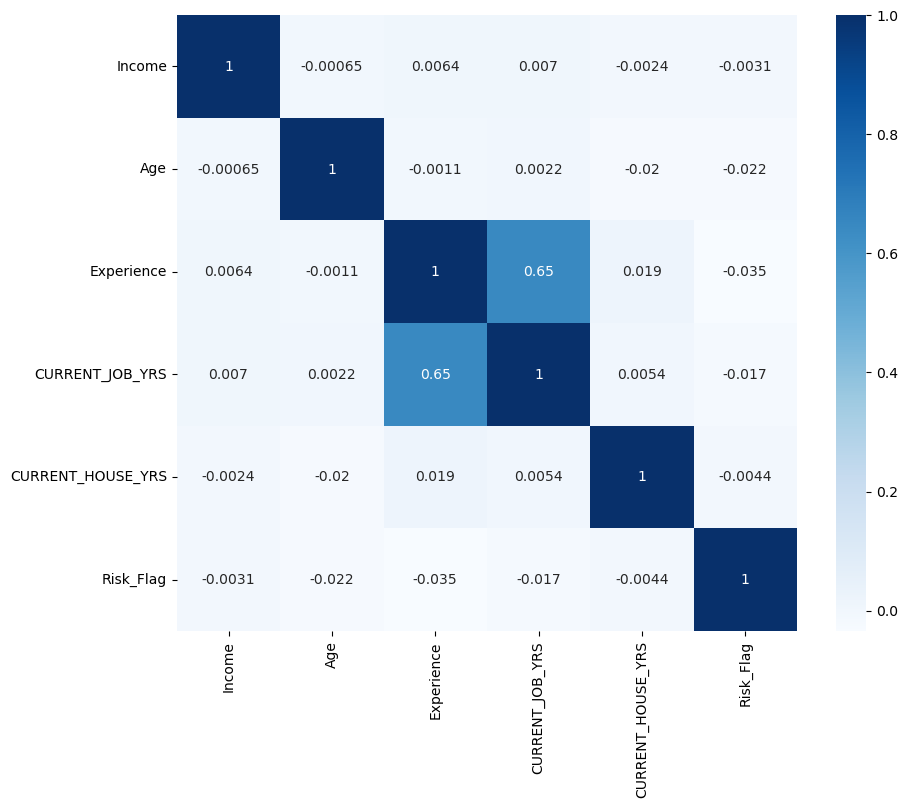

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical].corr(), cmap='Blues', annot=True)
plt.show()

C:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x600 with 0 Axes>

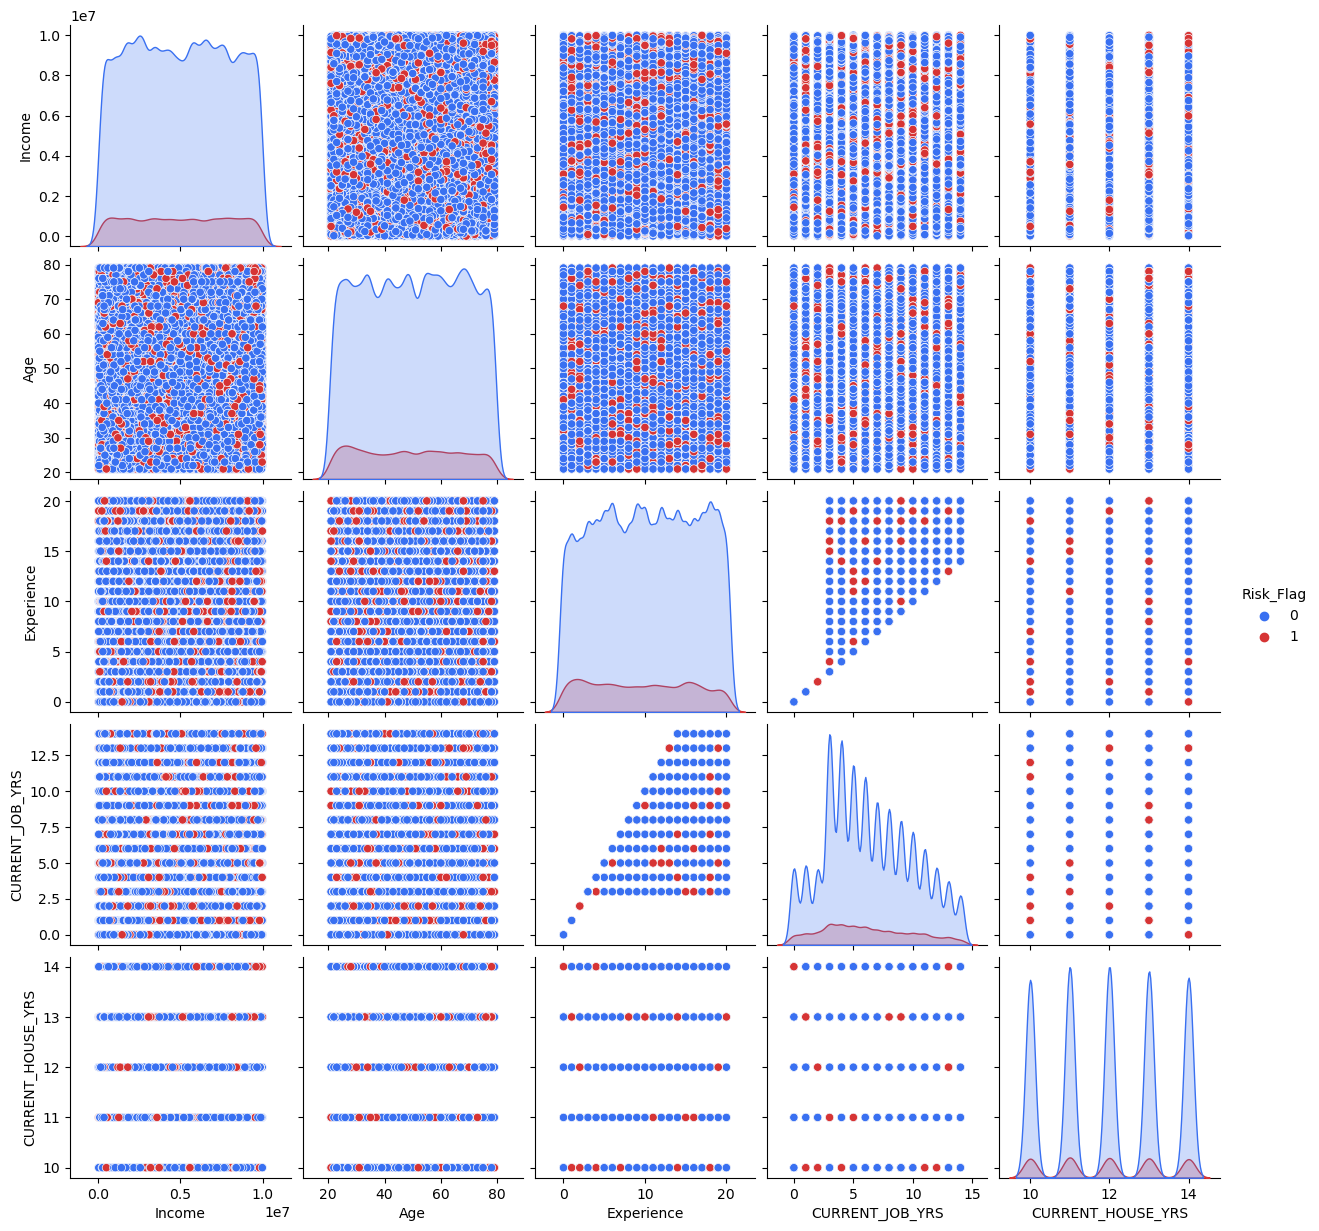

In [38]:
palette=['#3970F1', '#D63434']
plt.figure(figsize=(18, 6))
sns.pairplot(df, diag_kind='kde', hue='Risk_Flag', palette=palette)

Pada grafik Pair Plots (Numeric) di atas, dapat dilihat bahwa korelasi antar-feature Numeric tidak menunjukkan pola yang menarik, sehingga diperlukan segmentasi yang lebih baik.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\4208493812.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\4208493812.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\4208493812.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\4208493812.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\4208493812.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


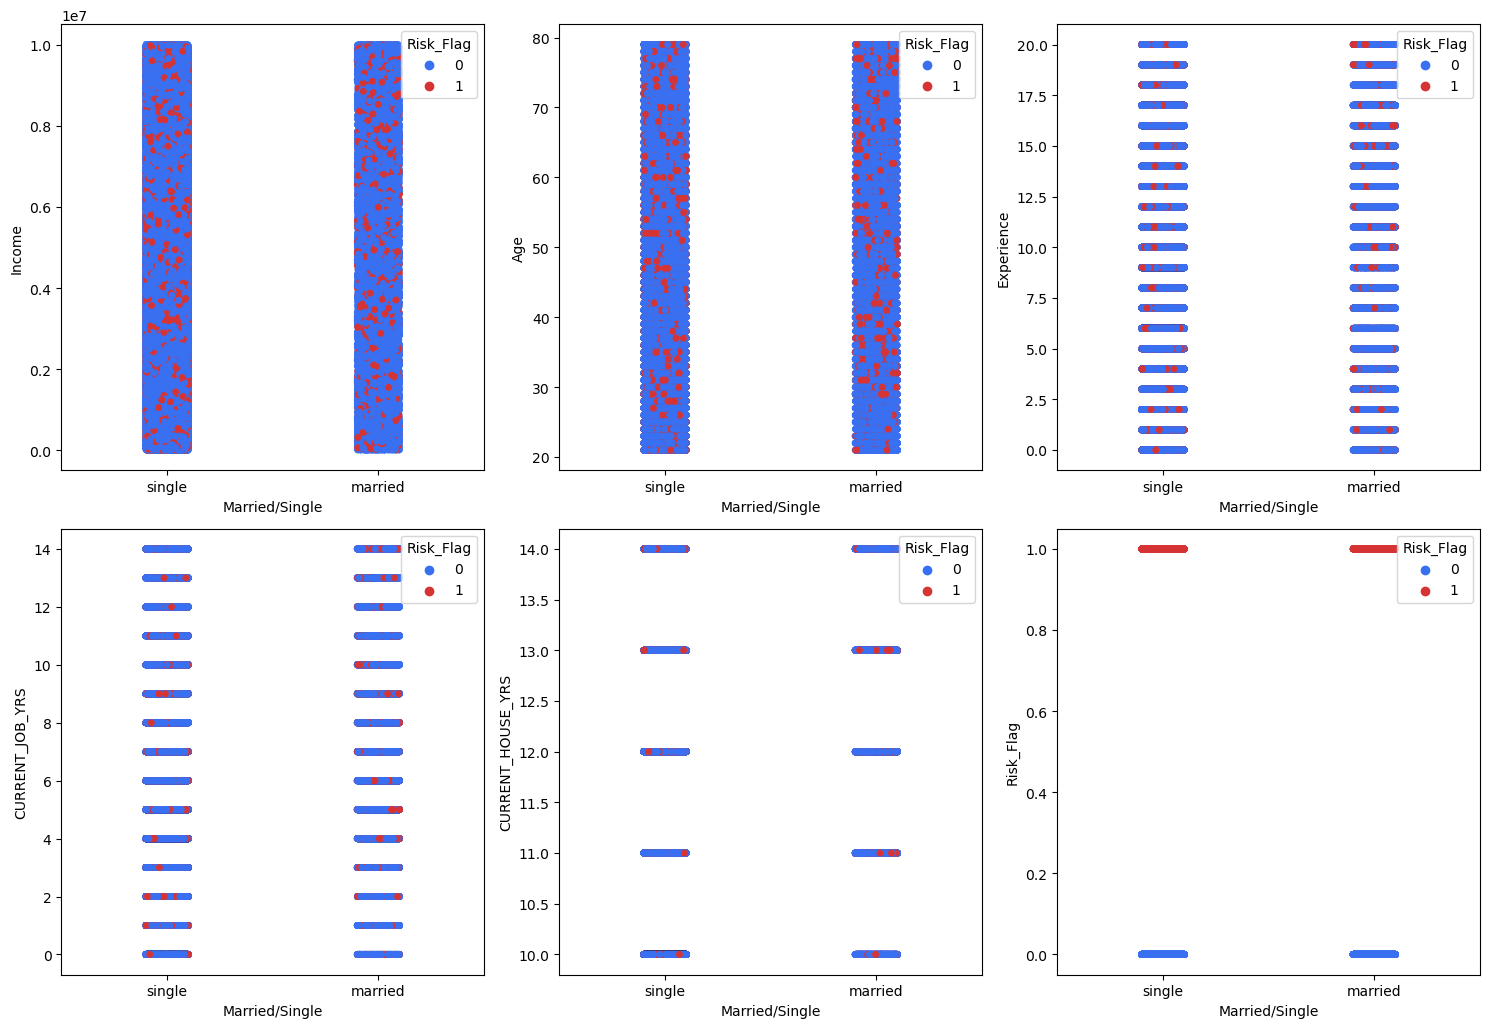

In [49]:
# Married/Single
palette=['#3970F1', '#D63434']
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)) :
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(data=df, x="Married/Single", y=numerical[i], hue='Risk_Flag', palette=palette)
    plt.tight_layout()


Pada grafik Category Plots (Category-Numeric) di atas, dapat dilihat bahwa korelasi feature "Married/Single" dengan feature Numeric tidak menunjukkan pola yang menarik.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\2128309218.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\2128309218.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\2128309218.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\2128309218.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\2128309218.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11772\2128309218.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\i

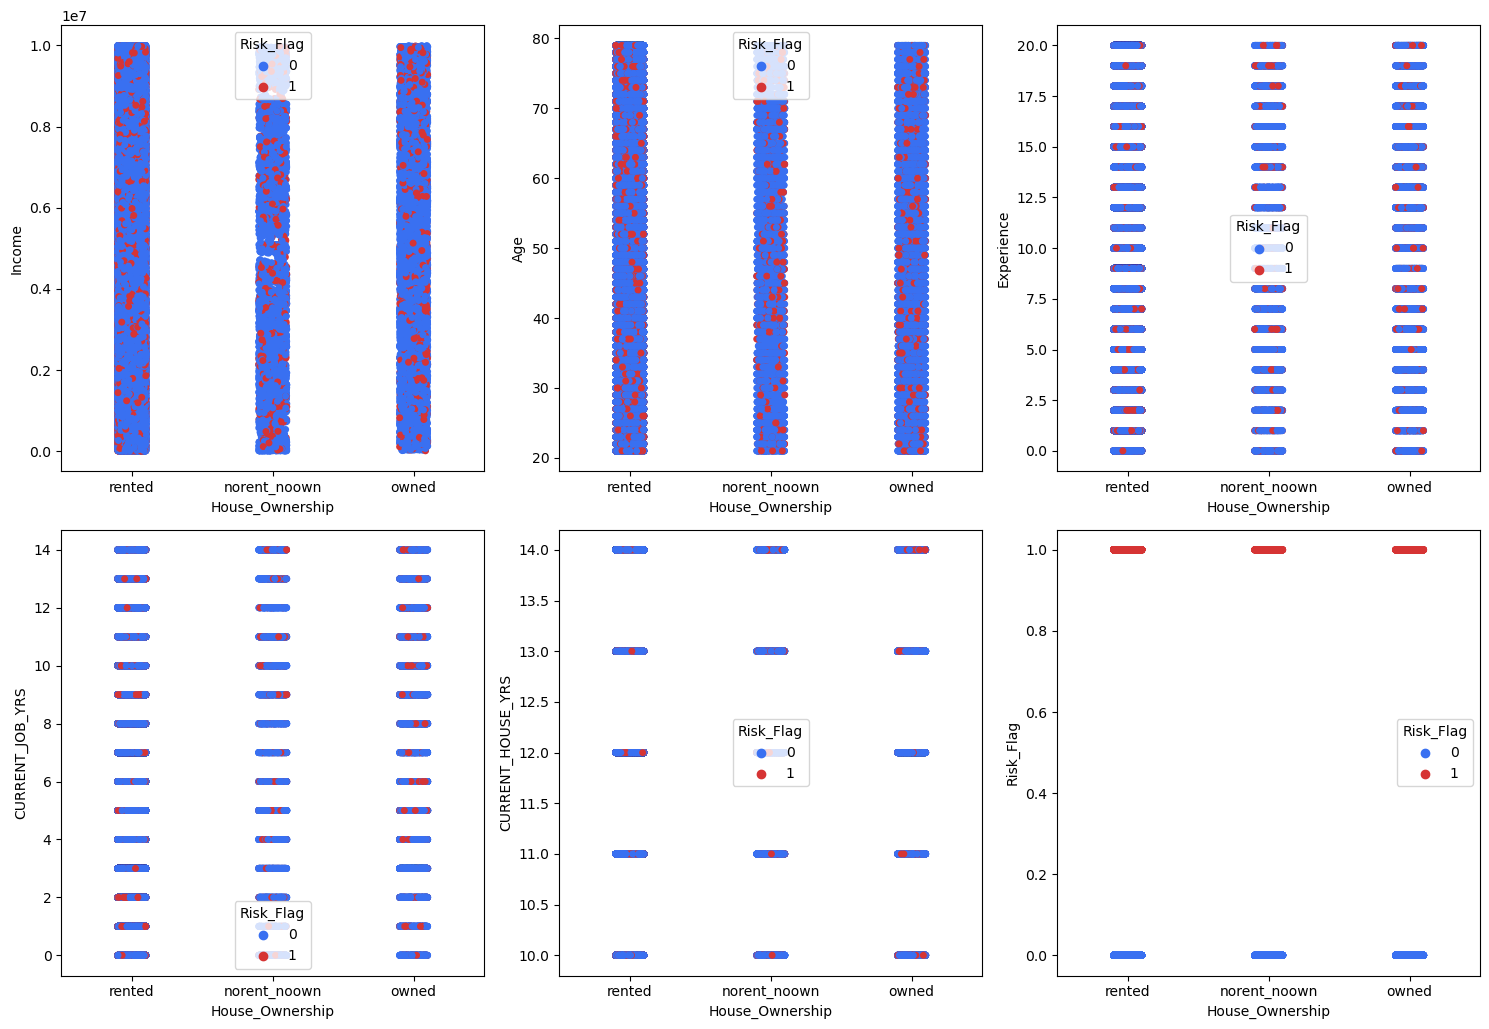

In [50]:
# House_Ownership
palette=['#3970F1', '#D63434']
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)) :
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(data=df, x="House_Ownership", y=numerical[i], hue='Risk_Flag', palette=palette)
    plt.tight_layout()


Pada grafik Category Plots (Category-Numeric) di atas, dapat dilihat bahwa korelasi feature "House_Ownership" dengan feature Numeric tidak menunjukkan pola yang menarik.

In [ ]:
# Car_Ownership
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)) :
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, df=df, x='Car_Ownership', y=numerical[i], hue='Risk_Flag', palette=palette)
    plt.tight_layout()

Pada grafik Category Plots (Category-Numeric) di atas, dapat dilihat bahwa korelasi feature "Car_Ownership" dengan feature Numeric tidak menunjukkan pola yang menarik.

### **OBSERVASI**

**A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?**

**Fitur numeric & target :**
Tidak ada fitur yang bisa dibilang berkorelasi kuat dengan target. Hal ini perlu dilakukan analisa mendalam lagi terkait fitur-fitur numeric yang kurang berkorelasi kuat dengan target secara data.

 - Fitur numeric dilihat korelasi masih sangat lemah sehingga kami akan melakukan analisa lebih lanjut lagi dengan melihat fitur category lainnya menguji korelasi kuat dengan target.

**B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?**
**Korelasi positif antar fitur:**
- CURRENT_JOB_YRS dengan Experience
- CURRENT_HOUSE_YRS dengan Experience
- CURRENT_HOUSE_YRS dengan CURRENT_JOB_YRS
- Experience dengan Income
- CURRENT_JOB_YRS dengan Income

**Korelasi negatif antar fitur:**
- Age dengan Income
- Age dengan Experience
- Age dengan CURRENT_HOUSE_YRS

 - Untuk fitur yang memiliki korelasi kuat, kita bisa fokus pada fitur itu dan juga akan melakukan analisa lanjutan untuk menghasilkan data yang maksimal. 


Untuk Category "Profession", "CITY", dan "STATE" tidak dilakukan pengecekan Pair Plot karena jumlah uniq terlalu banyak.

# 4. Business Insight

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. 

Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan
rekomendasinya untuk bisnis.

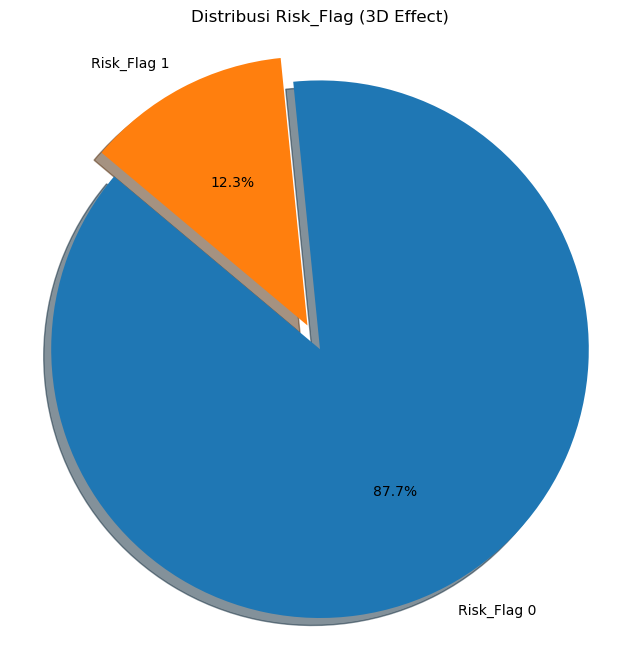

In [51]:
risk_counts = df['Risk_Flag'].value_counts()

labels = ['Risk_Flag 0', 'Risk_Flag 1']
sizes = risk_counts.values
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title('Distribusi Risk_Flag (3D Effect)')
plt.axis('equal')  
plt.show()

Berdasarkan grafik diatas menunjukkan persentase risk_flag dengan 2 kategori, yaitu 0 dan 1. Risk_flag 0 memiliki persentase 87.7%, sedangkan risk_flag 1 memiliki persentase 12.3%. Hal ini menunjukan bahwa sebagian besar data memiliki Risk_Flag 0, yaitu tidak berisiko. Sedangkan sebagian kecil data memiliki Risk_Flag 1, yaitu berisiko.

#### Insight 1 : Risk Rate Analysis Based on Profession

In [53]:
prof_risk_count = df.groupby('Profession')['Risk_Flag'].sum().reset_index()
prof_risk_count = prof_risk_count.sort_values(by='Risk_Flag', ascending=False).head(10).reset_index()

In [54]:
prof_risk_count

,index,Profession,Risk_Flag
0,38,Police_officer,826
1,43,Software_Developer,750
2,0,Air_traffic_controller,715
3,46,Surveyor,714
4,37,Physician,710
5,3,Army_officer,709
6,28,Hotel_Manager,701
7,47,Technical_writer,697
8,7,Chartered_Accountant,690
9,41,Scientist,690


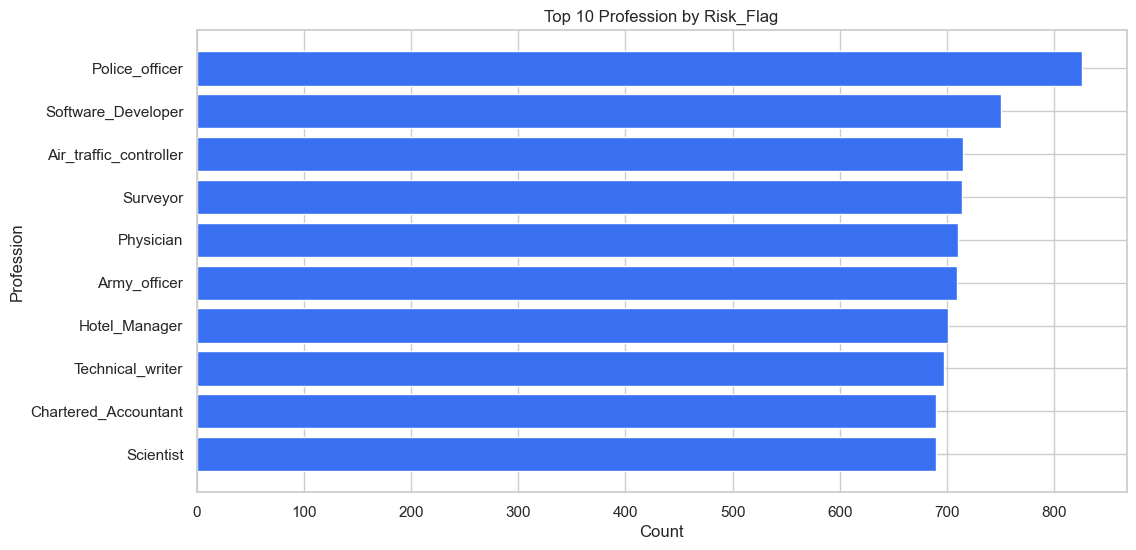

In [55]:
# Melakukan visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

plt.barh(prof_risk_count['Profession'],
         prof_risk_count['Risk_Flag'],
         color='#3970F1'
         )

plt.xlabel('Count')
plt.ylabel('Profession')
plt.title('Top 10 Profession by Risk_Flag')

plt.gca().invert_yaxis()
plt.show()

**Insight :**  
- Visualisasi data Profession berdasarkan Risk_Flag menunjukkan bahwa nasabah dengan profesi "Police Officer" memiliki tingkat risiko gagal bayar yang tinggi dengan jumlah sekitar 826. Hal ini mengindikasikan bahwa tingkat risiko gagal bayar meningkat pada nasabah yang berprofesi sebagai police_officer. Ada dua kemungkinan penyebab risiko gagal bayar ini. Pertama, mereka mungkin menghadapi kesulitan keuangan jika memiliki hutang besar atau beban keuangan lainnya. Kedua, risiko gagal bayar dapat disebabkan oleh kesulitan dalam proses penagihan oleh pihak pemberi pinjaman kepada nasabah yang berprofesi sebagai police_officer.

**Rekomendasi :**  
- Mengatasi profesi dengan tingkat risiko tinggi, perusahaan dapat melakukan analisis risiko yang lebih mendalam dan mempertimbangkan persyaratan tambahan sebelum memberikan persetujuan pinjaman.

#### Insight 2 : Risk Rate Analysis Based on CURRENT_JOB_YRS

In [56]:
job_counts = df.groupby('CURRENT_JOB_YRS')['Risk_Flag'].sum().reset_index()
job_counts = job_counts.sort_values(by='Risk_Flag', ascending=False)

In [57]:
job_counts

,CURRENT_JOB_YRS,Risk_Flag
3,3,3411
4,4,3207
5,5,2972
6,6,2870
7,7,2345
8,8,2181
2,2,1890
10,10,1880
9,9,1850
1,1,1802


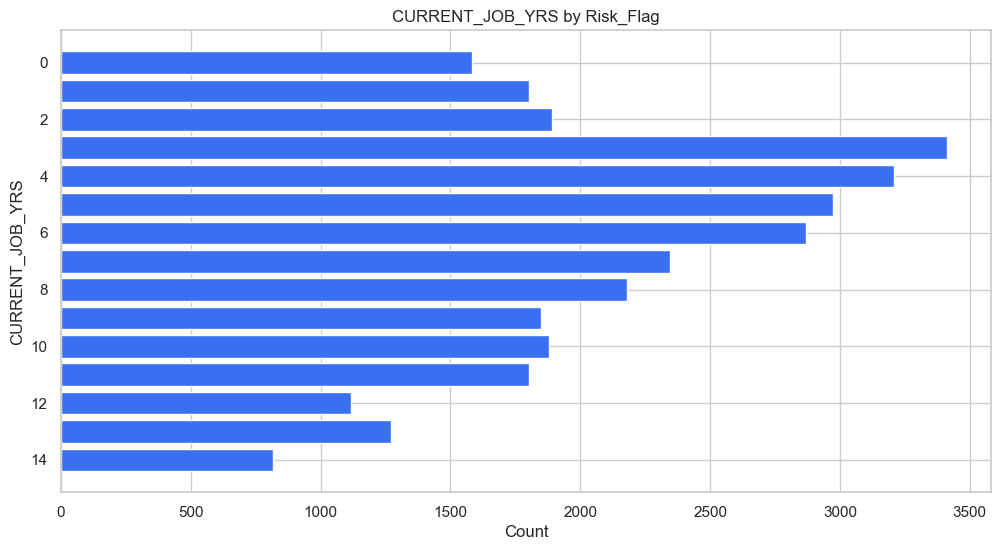

In [58]:
# Melakukan visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

plt.barh(job_counts['CURRENT_JOB_YRS'],
         job_counts['Risk_Flag'],
         color='#3970F1'
         )

plt.xlabel('Count')
plt.ylabel('CURRENT_JOB_YRS')
plt.title('CURRENT_JOB_YRS by Risk_Flag')

plt.gca().invert_yaxis()
plt.show()

**Insight :**     
- Berdasarkan data CURRENT_JOB_YRS dan Risk_Flag, terlihat bahwa nasabah yang telah memiliki pengalaman kerja selama 3 hingga 6 tahun cenderung memiliki tingkat risiko gagal bayar pinjaman yang lebih tinggi. Namun, setelah melewati periode ini, risiko gagal bayar cenderung menurun secara signifikan. Khususnya, pada tahun ke-10, terjadi kenaikan dalam risiko gagal bayar, kemudian mengalami penurunan pada tahun berikutnya.
Hal ini menunjukkan bahwa nasabah yang telah bekerja selama 3 hingga 6 tahun mungkin mengalami tekanan finansial atau risiko gagal bayar yang lebih tinggi, seperti tingkat tanggung jawab yang meningkat, faktor meningkatnya komitmen finansial atau perubahan dalam situasi keuangan pribadi.

**Rekomendasi :**  
- Pemantauan Intensif pada Tahun 3-6, perusahaan dapat memfokuskan pemantauan khusus pada nasabah yang berada dalam kisaran 3-6 tahun pengalaman kerja untuk meminimalisir risiko gagal bayar pinjaman.
- Rasio Utang Maksimum: Menetapkan rasio utang maksimum yang dapat diterima untuk nasabah dalam kategori pengalaman kerja 3 hingga 6 tahun untuk meminimalkan risiko gagal bayar.
- Evaluasi Khusus untuk Nasabah dengan Pengalaman 10 Tahun: Untuk nasabah dengan pengalaman kerja 10 tahun, perusahaan dapat melakukan evaluasi khusus untuk memahami faktor-faktor yang mungkin mempengaruhi risiko gagal bayar pada titik ini.

#### Insight 3 : Risk Rate Analysis Based on Married/Single

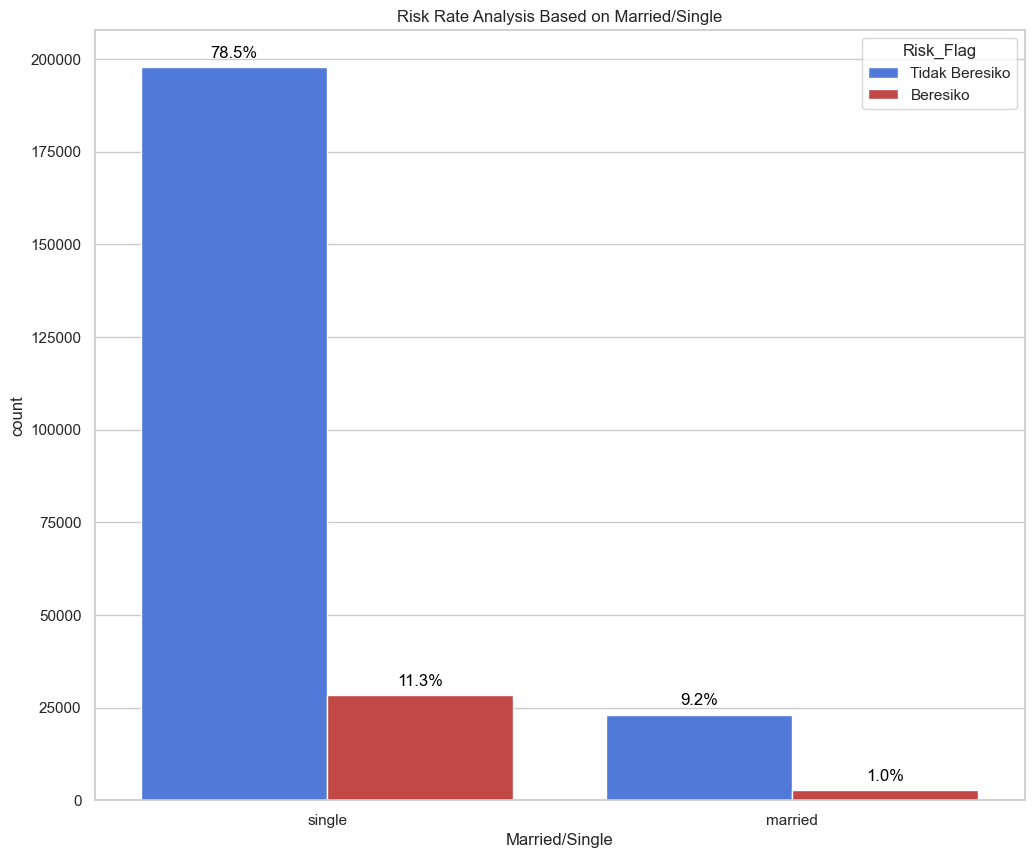

In [61]:
# Melakukan visualisasi countplot
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
ax = sns.countplot(x='Married/Single',
                   data=df,  # Gunakan 'data' bukan 'df'
                   hue='Risk_Flag',
                   palette=palette
                  )

plt.title('Risk Rate Analysis Based on Married/Single')
plt.xlabel('Married/Single')
plt.ylabel("count")

total = len(df)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='center',
                fontsize=12,
                color='black',
                xytext=(0, 10),
                textcoords='offset points'
               )

# Menambahkan legenda
legend_labels = ['Tidak Beresiko', 'Beresiko']
plt.legend(legend_labels, title="Risk_Flag")

plt.show()


**Insight :**  
- Berdasarkan data Married/Single dan Risk_Flag, terdapat perbedaan signifikan dalam tingkat risiko gagal bayar pinjaman antara pelanggan yang memiliki status single (11,3%) dan pelanggan yang berstatus married (1,0%). Hal ini mungkin disebabkan oleh beberapa faktor, seperti perbedaan dalam pendapatan, kepemilikan aset, dan tingkat tanggungan biaya hidup. Namun, perlu diperhatikan bahwa pelanggan yang berstatus single cenderung menunjukkan karakter kepribadian yang kurang bertanggung jawab dibandingkan dengan pelanggan yang berstatus married.

**Rekomendasi :**  
- Perusahaan dapat melakukan analisis lebih mendalam terhadap peminjam yang memiliki status 'single' dan dianggap memiliki risiko yang lebih tinggi. Dengan pendekatan ini, perusahaan dapat memastikan bahwa mereka mengidentifikasi peminjam 'single' yang sebenarnya memiliki kelayakan kredit, sehingga dapat mengurangi risiko gagal bayar dan tetap melayani pelanggan yang kredibel.

- Segmentasi pelanggan berdasarkan status merried/single mungkin menjadi strategi yang efektif. Ini dapat membantu perusahaan dalam menawarkan produk dan layanan yang lebih sesuai dengan karakteristik dan kebutuhan masing-masing kelompok.


# 5. Git


Upload project teman-teman di sebuah repository git. Berkolaborasilah di Git jika ada perubahan version dari waktu ke waktu.

A. Buat Repository Git

Link repository : [klik disini](https://github.com/HafiizhTH/FinalProject_Kelompok1A.git)  

B. Upload file notebook atau file pengerjaan lainnya pada repository tersebut
Untuk file README, dapat merupakan summary insight yang telah didapatkan dari EDA.